In [1]:
import pandas as pd
import numpy as np

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve 
from sklearn import metrics
from sklearn.metrics import (accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc, 
                             mean_squared_error, log_loss, precision_recall_curve, classification_report, 
                             precision_recall_fscore_support)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost.sklearn import XGBClassifier
#import scikitplot as skplt
#import lime 
#import lime.lime_tabular
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os

#Add Graphviz path to environment variable PATH, used for visualizing decision trees
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

#Import supporting functions
from calculate_model_metrics import lift_plot_model, plot_roc, plot_grid_search, evaluate_model

import warnings
warnings.filterwarnings("ignore")

C:\Users\Hardev\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
df_train = pd.read_csv(r'C:\Users\Hardev\Desktop\MyIITCourses\CSP 571 Data Preparation and Analysis\Project\csp571_fp-master (2)\csp571_fp-master\data\train_test\primary\train_relevant.csv')
df_test = pd.read_csv(r'C:\Users\Hardev\Desktop\MyIITCourses\CSP 571 Data Preparation and Analysis\Project\csp571_fp-master (2)\csp571_fp-master\data\train_test\primary\test_relevant.csv')


In [4]:
df_train.shape

(588, 31)

In [5]:
df_test.shape

(145, 31)

In [6]:
df_train.head()

,name,year,salary,Pos,Age,Tm,GS,MP,PER,TS%,...,3P,3P%,2P,2P%,eFG%,FT,FT%,AST,PF,PTS
0,aaron brooks,2016,2700000.0,PG,31,CHI,0,1108,11.8,0.494,...,66,0.357,122,0.430,0.471,49,0.766,180,132,491
1,aaron brooks,2017,2116955.0,PG,32,IND,0,894,9.5,0.507,...,48,0.375,73,0.424,0.483,32,0.800,125,93,322
2,aaron gordon,2016,4351320.0,PF,20,ORL,37,1863,17.0,0.541,...,42,0.296,232,0.531,0.509,129,0.668,128,153,719
3,aaron gordon,2017,5504420.0,SF,21,ORL,72,2298,14.4,0.530,...,77,0.288,316,0.528,0.499,156,0.719,150,172,1019
4,adreian payne,2016,2022240.0,PF,24,MIN,2,486,5.6,0.422,...,9,0.281,44,0.389,0.397,17,0.654,29,77,132


In [7]:
df_train.describe()

,year,salary,Age,GS,MP,PER,TS%,TRB%,AST%,STL%,...,3P,3P%,2P,2P%,eFG%,FT,FT%,AST,PF,PTS
count,588.000000,5.880000e+02,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,...,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,2016.496599,7.908947e+06,26.464286,30.996599,1460.438776,14.194728,0.539469,10.394388,13.352551,1.581973,...,55.096939,0.303653,182.569728,0.489954,0.504836,110.534014,0.750140,135.715986,121.035714,640.964286
std,0.500414,7.332209e+06,4.342698,30.170215,795.765311,4.918587,0.062664,4.781098,9.078834,0.781394,...,56.033658,0.124061,142.634701,0.081152,0.067900,109.116885,0.118856,139.000432,61.888126,469.420891
min,2016.000000,1.722400e+04,19.000000,0.000000,6.000000,-2.100000,0.184000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,2.116955e+06,23.000000,2.750000,823.000000,10.900000,0.510000,6.400000,7.200000,1.100000,...,4.000000,0.271142,72.750000,0.452000,0.473000,36.750000,0.695750,48.000000,77.000000,296.750000
50%,2016.000000,5.200000e+06,26.000000,18.500000,1481.500000,13.700000,0.541000,9.300000,10.450000,1.500000,...,42.000000,0.333000,153.000000,0.486500,0.506000,77.500000,0.768000,96.500000,125.000000,545.000000
75%,2017.000000,1.203230e+07,29.000000,62.250000,2099.750000,17.000000,0.573000,13.600000,17.300000,1.900000,...,91.000000,0.372000,259.500000,0.531250,0.537000,146.000000,0.829000,176.250000,165.000000,894.000000
max,2017.000000,3.468255e+07,40.000000,82.000000,3125.000000,32.000000,1.000000,25.600000,52.700000,10.300000,...,324.000000,1.000000,730.000000,1.000000,1.000000,746.000000,1.000000,906.000000,278.000000,2376.000000


In [8]:
df_all = pd.concat([df_train, df_test], axis = 0)

In [9]:
df_all.shape

(733, 31)

In [10]:
df_train.shape

(588, 31)

In [11]:
df_test.shape

(145, 31)

In [12]:
total = df_all.isnull().sum().sort_values(ascending = False)
percent = (df_all.isnull().sum()/df_all.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data[missing_train_data['Percent']>0].shape

(0, 2)

In [13]:
columns_list = df_all.columns.tolist()

In [14]:
var_model_all = ['salary',	'Pos',	'Age',	'Tm',	'GS',	'MP',	'PER',	'TS%',	'TRB%',	'AST%',	'STL%',	'BLK%',	'TOV%',	'USG%',	'WS',	'BPM',	'VORP',	'FG',	'FG%',	'3P',	'3P%',	'2P',	'2P%',	'eFG%',	'FT',	'FT%',	'AST',	'PF',	'PTS']

In [15]:
var_input = ['Pos',	'Age',	'Tm',	'GS',	'MP',	'PER',	'TS%',	'TRB%',	'AST%',	'STL%',	'BLK%',	'TOV%',	'USG%',	'WS',	'BPM',	'VORP',	'FG',	'FG%',	'3P',	'3P%',	'2P',	'2P%',	'eFG%',	'FT',	'FT%',	'AST',	'PF',	'PTS']

In [16]:
var_output = ['salary']

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBClassifier

In [18]:
df_train_model = df_train[var_model_all]
df_test_model = df_test[var_model_all]

In [19]:
X_train = df_train_model[var_input]
X_test = df_test_model[var_input]

Y_train = df_train_model[var_output]
Y_test = df_test_model[var_output]

In [20]:
X_train.head()

,Pos,Age,Tm,GS,MP,PER,TS%,TRB%,AST%,STL%,...,3P,3P%,2P,2P%,eFG%,FT,FT%,AST,PF,PTS
0,PG,31,CHI,0,1108,11.8,0.494,4.8,26.0,1.4,...,66,0.357,122,0.430,0.471,49,0.766,180,132,491
1,PG,32,IND,0,894,9.5,0.507,4.3,20.7,1.4,...,48,0.375,73,0.424,0.483,32,0.800,125,93,322
2,PF,20,ORL,37,1863,17.0,0.541,15.1,10.3,1.6,...,42,0.296,232,0.531,0.509,129,0.668,128,153,719
3,SF,21,ORL,72,2298,14.4,0.530,9.6,10.5,1.4,...,77,0.288,316,0.528,0.499,156,0.719,150,172,1019
4,PF,24,MIN,2,486,5.6,0.422,13.3,8.9,1.7,...,9,0.281,44,0.389,0.397,17,0.654,29,77,132


In [21]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [22]:
X_test = pd.get_dummies(X_test, drop_first=True)

In [23]:
X_test.head()

,Age,GS,MP,PER,TS%,TRB%,AST%,STL%,BLK%,TOV%,...,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
0,25,82,2341,12.7,0.533,11.5,8.8,1.5,1.8,13.2,...,0,0,0,1,0,0,0,0,0,0
1,33,0,192,9.2,0.495,7.9,10.3,1.0,0.4,3.0,...,0,0,0,0,0,0,0,0,0,1
2,28,38,1632,8.4,0.572,8.3,6.2,1.9,0.7,16.2,...,0,0,0,0,0,0,0,0,0,0
3,22,81,2666,21.2,0.499,24.5,4.4,2.3,3.2,10.5,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1998,14.4,0.624,8.3,16.7,1.8,1.5,11.2,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_test.shape

(145, 60)

In [25]:
X_train.head()

,Age,GS,MP,PER,TS%,TRB%,AST%,STL%,BLK%,TOV%,...,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
0,31,0,1108,11.8,0.494,4.8,26.0,1.4,0.7,14.2,...,0,0,0,0,0,0,0,0,0,0
1,32,0,894,9.5,0.507,4.3,20.7,1.4,0.9,17.2,...,0,0,0,0,0,0,0,0,0,0
2,20,37,1863,17.0,0.541,15.1,10.3,1.6,2.4,9.0,...,1,0,0,0,0,0,0,0,0,0
3,21,72,2298,14.4,0.530,9.6,10.5,1.4,1.4,8.5,...,1,0,0,0,0,0,0,0,0,0
4,24,2,486,5.6,0.422,13.3,8.9,1.7,1.8,18.7,...,0,0,0,0,0,0,0,0,0,0


In [26]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [27]:
def returnFeatureImportance(gbm_model, vec):
    feature_importance = gbm_model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    featuresNames = []
    featureImps =[]
    for item in sorted_idx[::-1][:]:
        featuresNames.append(vec[item])
        featureImps.append(feature_importance[item])
    featureImportance = pd.DataFrame([featuresNames, featureImps]).transpose()
    featureImportance.columns = ['FeatureName', 'Relative Importance']
    return featureImportance

In [28]:
def return_regression_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    metrics_all = []
    r2_score_model = r2_score(y_true, y_pred)
    metrics_all.append(r2_score_model)

    
    
    rmse_model = (mean_squared_error(y_true, y_pred))**0.5
    metrics_all.append(rmse_model)
    
    mae = mean_absolute_error(y_true, y_pred)
    metrics_all.append(mae)
        
    
    return(metrics_all)    

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [30]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

In [31]:
param_grid = {'max_depth': [6,10, 16,20, 24],
              'max_features' : [10,20,30,40,46],
              'min_samples_leaf': [5, 10, 25, 35],
              'random_state':[398]
              }
est = DecisionTreeRegressor()
gs_cv = GridSearchCV(est, param_grid, n_jobs=1).fit(X_train, Y_train)
print ( "the best parameters", gs_cv.best_params_)
params = gs_cv.best_params_

the best parameters {'max_depth': 6, 'max_features': 30, 'min_samples_leaf': 25, 'random_state': 398}


In [32]:
#params = {'max_depth': 15,  "random_state": SEED}
SEED = 42

#params = {'max_depth': 6, 'min_samples_leaf':10,  "random_state": SEED}

model_name = 'Decision Tree'
dt = DecisionTreeRegressor(**params)
#dt=DecisionTreeRegressor()

trained_model_dt = dt.fit(X_train,Y_train)

In [33]:
trained_model_dt

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=30,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=25,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=398, splitter='best')

In [34]:
X_train.shape

(588, 60)

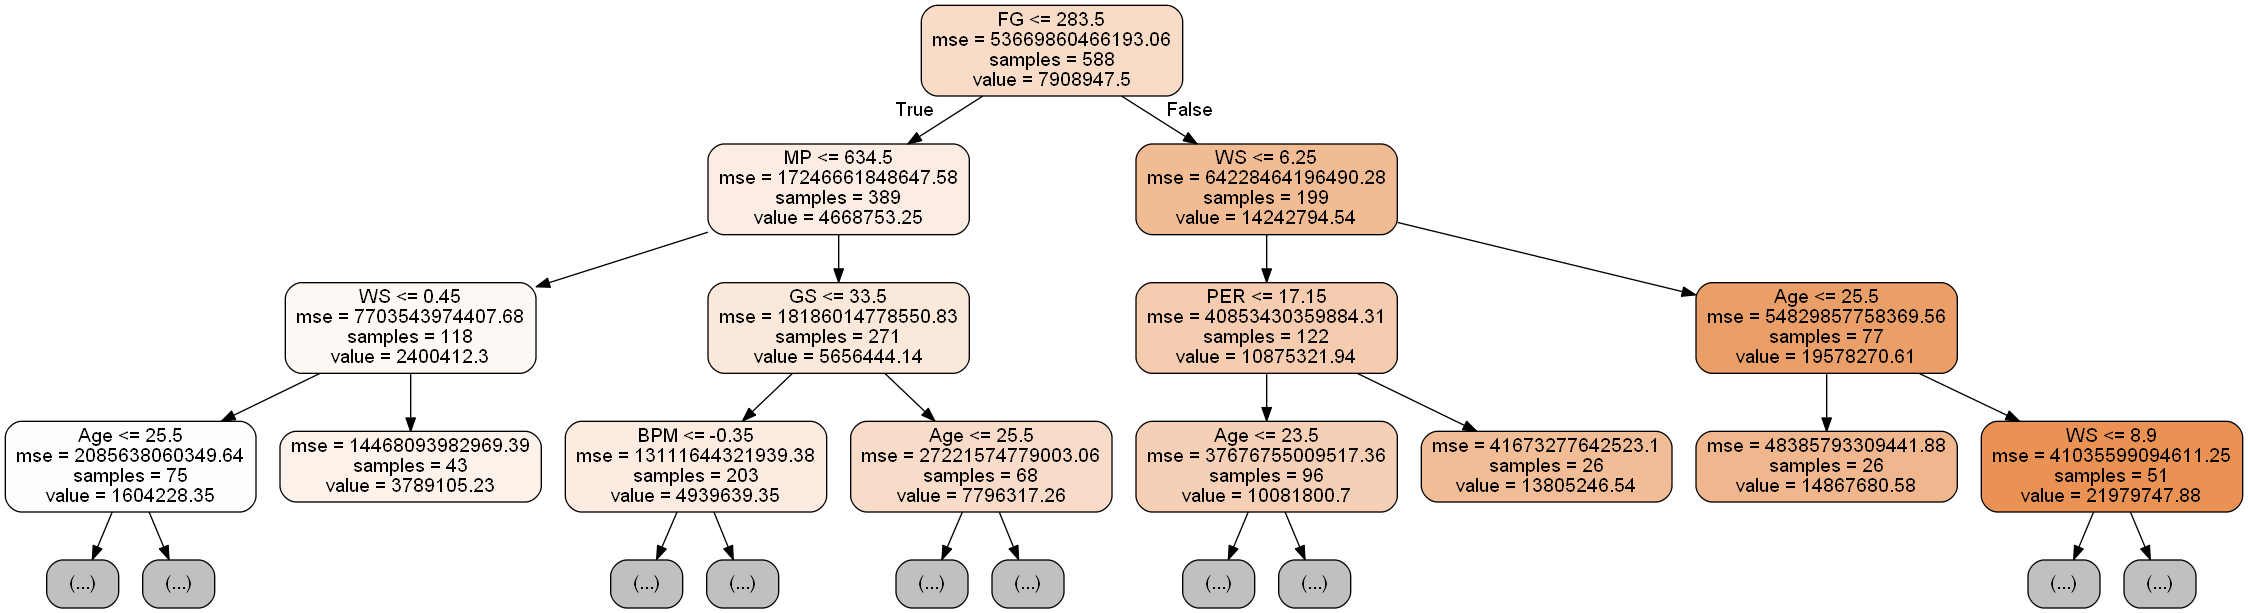

In [35]:
dot_data = StringIO()

export_graphviz(trained_model_dt, out_file=dot_data, 
                feature_names = X_train.columns,
                max_depth = 3,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [36]:
dt_model_predict_train = trained_model_dt.predict(X_train)
dt_model_predict_test = trained_model_dt.predict(X_test)

In [40]:
metrics_train = return_regression_metrics(Y_train, dt_model_predict_train)

metrics_test = return_regression_metrics(Y_test, dt_model_predict_test)

In [41]:
print(metrics_train)

[0.6455394026937742, 4361633.959674826, 3255677.476321826]


In [42]:
print(metrics_test)

[0.378677637774645, 5599456.442551026, 4293704.394026719]


In [43]:
feature_importance_dt =  returnFeatureImportance(trained_model_dt, X_train.columns.tolist())
feature_importance_dt.to_csv('feature_importance_decisiontree_v1.csv',index=False)

In [44]:
feature_importance_dt.head(4)

,FeatureName,Relative Importance
0,FG,100
1,WS,34.9596
2,Age,14.2956
3,MP,7.22209


In [47]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBClassifier

In [48]:
# Create random forest classifier model 

model_name = 'Random Forest'
clf = RandomForestRegressor()
trained_model_rf = clf.fit(X_train,Y_train)

In [49]:
trained_model_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [50]:
param_grid = {'n_estimators': [200,400],
              'max_depth': [6,10, 16],
              'max_features' : [10,30,46],
              'min_samples_leaf': [5, 10, 25],
              'random_state':[398]
              }


est = RandomForestRegressor()
gs_cv = GridSearchCV(est, param_grid, n_jobs=1).fit(X_train, Y_train)
print ( "the best parameters", gs_cv.best_params_)
params = gs_cv.best_params_

the best parameters {'max_depth': 6, 'max_features': 46, 'min_samples_leaf': 5, 'n_estimators': 400, 'random_state': 398}


In [51]:
model_name = 'Random Forest'
rf_best_model = RandomForestRegressor(**params)

trained_model_rf = rf_best_model.fit(X_train,Y_train)

In [52]:
rf_model_predict_train = trained_model_rf.predict(X_train)
rf_model_predict_test = trained_model_rf.predict(X_test)

In [53]:
metrics_train = return_regression_metrics(Y_train, rf_model_predict_train)
metrics_test = return_regression_metrics(Y_test, rf_model_predict_test)

In [54]:
feature_importance_dt =  returnFeatureImportance(rf_best_model, X_train.columns.tolist())
feature_importance_dt.to_csv('feature_importance_random_forest_v1.csv',index=False)

In [55]:
print(metrics_train)

[0.8082829139586529, 3207714.0235414198, 2398166.257843828]


In [56]:
print(metrics_test)

[0.4941488081217581, 5052412.106433371, 3877853.955961598]


In [57]:
##### GBM Model Below

In [59]:
param_grid = {'learning_rate': [0.1, 0.05, 0.01],
              'n_estimators': [200,400,600],
              'max_depth': [6,10, 16],
              'max_features' : [10,30,46],
              'min_samples_leaf': [5, 10, 25],
              'random_state':[398]
              }


est =  GradientBoostingRegressor()
gs_cv = GridSearchCV(est, param_grid, n_jobs=1).fit(X_train, Y_train)
print ( "the best parameters", gs_cv.best_params_)
params = gs_cv.best_params_

the best parameters {'learning_rate': 0.05, 'max_depth': 16, 'max_features': 30, 'min_samples_leaf': 5, 'n_estimators': 400, 'random_state': 398}


In [60]:
gbm_model = GradientBoostingRegressor(**params)
gbm_model.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=16,
                          max_features=30, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=398, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
feature_importance_dt =  returnFeatureImportance(gbm_model, X_train.columns.tolist())
feature_importance_dt.to_csv('feature_importance_gbm_model_v1.csv',index=False)

In [62]:
gbm_model_predict_train = gbm_model.predict(X_train)
gbm_model_predict_test = gbm_model.predict(X_test)

In [63]:
metrics_train = return_regression_metrics(Y_train, gbm_model_predict_train)
metrics_test = return_regression_metrics(Y_test, gbm_model_predict_test)

In [64]:
print(metrics_train)

[0.9999949683176826, 16433.188609793684, 3633.0605110102715]


In [65]:
print(metrics_test)

[0.4588905746798182, 5225524.974153249, 3934393.303029344]


In [66]:
X_train.shape

(588, 60)

In [67]:
# Create range of values for parameter
param_range = np.arange(1, 100, 5)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(GradientBoostingRegressor(), 
                                             X_train, 
                                             Y_train, 
                                             param_name="min_samples_leaf", 
                                             param_range=param_range,
                                             cv=3,
#                                             scoring="accuracy", 
                                             n_jobs=4,
                                             verbose = 2)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  60 | elapsed:    8.1s remaining:    8.1s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    9.6s finished


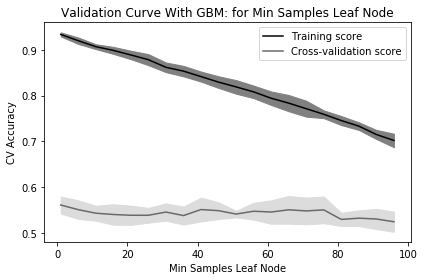

In [68]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")


# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With GBM: for Min Samples Leaf Node")
plt.xlabel("Min Samples Leaf Node")
plt.ylabel("CV Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve 

In [70]:
# Create range of values for parameter
param_range = np.arange(1, 1000, 50)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestRegressor(), 
                                             X_train, 
                                             Y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3,
#                                             scoring="accuracy", 
                                             n_jobs=4,
                                             verbose = 2)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  60 | elapsed:   30.3s remaining:   30.3s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  1.1min finished


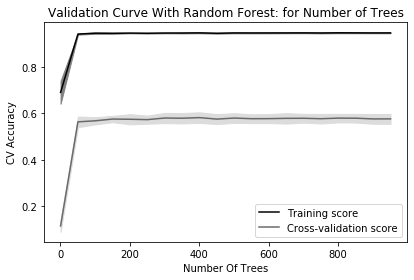

In [71]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")


# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest: for Number of Trees")
plt.xlabel("Number Of Trees")
plt.ylabel("CV Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [72]:
# Create range of values for parameter
param_range = np.arange(1, 60, 10)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestRegressor(), 
                                             X_train, 
                                             Y_train, 
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=3,
#                                             scoring="accuracy", 
                                             n_jobs=4,
                                             verbose = 2)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   9 out of  18 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    0.5s finished


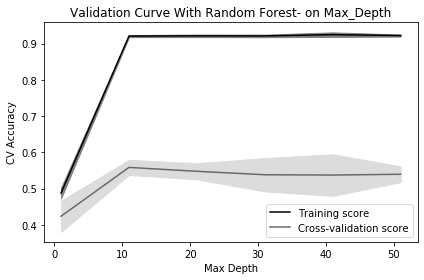

In [73]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")


# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest- on Max_Depth")
plt.xlabel("Max Depth")
plt.ylabel("CV Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [74]:
# Create range of values for parameter
param_range = np.arange(5, 150, 10)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestRegressor(), 
                                             X_train, 
                                             Y_train, 
                                             param_name="min_samples_leaf", 
                                             param_range=param_range,
                                             cv=3,
#                                             scoring="accuracy", 
                                             n_jobs=4,
                                             verbose = 2)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  23 out of  45 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.9s finished


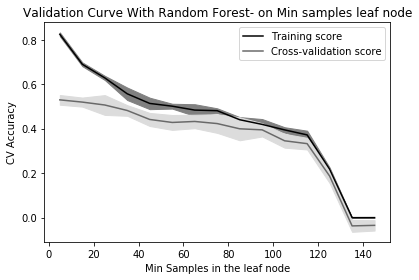

In [75]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")


# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest- on Min samples leaf node")
plt.xlabel("Min Samples in the leaf node")
plt.ylabel("CV Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [76]:
X_train.shape

(588, 60)

In [77]:
# Create range of values for parameter
param_range = np.arange(1, 60, 5 )

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestRegressor(), 
                                             X_train, 
                                             Y_train, 
                                             param_name="max_features", 
                                             param_range=param_range,
                                             cv=3,
#                                             scoring="accuracy", 
                                             n_jobs=4,
                                             verbose = 2)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  36 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:    1.0s finished


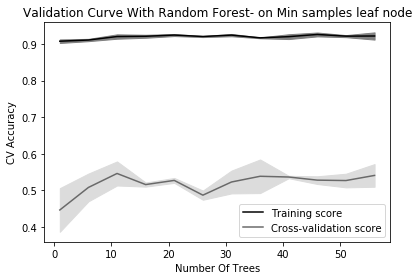

In [78]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")


# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest- on Min samples leaf node")
plt.xlabel("Number Of Trees")
plt.ylabel("CV Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()